# Chapter 10. Graphics for Communication

By now, you should have plenty of experience making visualizations from `pandas` DataFrames. But how do you give your graphics the professional polish necessary for a presentation or a publication? This chapter discusses some general strategies for making professional-looking, information-dense graphics.


## Documentation

* `matplotlib` API: https://matplotlib.org/stable/api/index.html
*  `matplotlib.pyplot`: https://matplotlib.org/stable/api/pyplot_summary.html
* Matplotlib figure objects: `matplotlib.figure`: https://matplotlib.org/stable/api/figure_api.html

* Plot title:  `matplotlib.pyplot.title`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
*  Plot Axis labels:
    * `matplotlib.pyplot.Xlabel`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    * `matplotlib.pyplot.Ylabel`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
* Plot Axis limits:
    * `matplotlib.pyplot.xlim`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html
    * `matplotlib.pyplot.ylim`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html
* Axis Tickmark locations:
    * `matplotlib.pyplot.xticks`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
    * `matplotlib.pyplot.yticks`: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html
* Plot spines:
    * object: https://matplotlib.org/stable/api/spines_api.html 
    * `matplotlib.pyplot.spines`: https://matplotlib.org/stable/api/spines_api.html

* Plot Styles: https://matplotlib.org/stable/api/style_api.html

* Matplot lib plot parameters: `RCParams`: https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams



# 10.1 Polishing Graphics Using Matplotlib

The `pandas` plotting functions are built on top of `matplotlib`, the basic plotting library in Python. In this section, we will look at how to use `matplotlib` to polish graphics that were made using `pandas` plotting.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline

titanic = pd.read_csv("../data/titanic.csv")
housing = pd.read_csv("../data/AmesHousing.txt", sep="\t")

## Labels and Titles

In Chapter 2, we made a graphic where we showed the number of survivors by `sex` and `pclass`. But there is no way to tell from this graph that what is being plotted is the number of survivors.

In [4]:
survival_counts = titanic.groupby(["pclass", "sex"]).survived.sum().unstack()
survival_counts

sex     female  male
pclass              
1          139    61
2           94    25
3          106    75

sex     female  male
pclass              
1          139    61
2           94    25
3          106    75

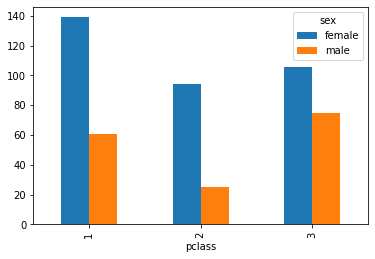

In [5]:
survival_counts.plot.bar()
survival_counts

We need to add a label to the $y$-axis. Since the `pandas` plotting functions are just wrappers around `matplotlib`, we can call `matplotlib` to set the label for the $y$-axis manually. The function `plt.ylabel()` sets the label for the $y$-axis.

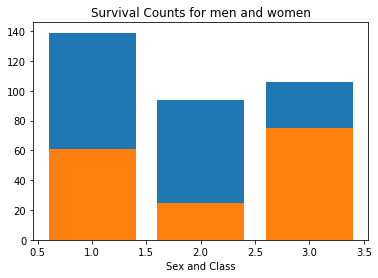

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(x = survival_counts.index, height=survival_counts["female"])
plt.bar(x = survival_counts.index, height = survival_counts["male"])
plt.title("Survival Counts for men and women")
plt.xlabel("Sex and Class")
plt.show()

Text(0, 0.5, 'Number of Survivors')

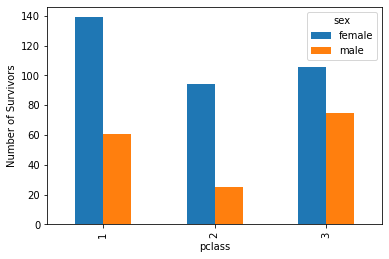

In [15]:


survival_counts.plot.bar()
plt.ylabel("Number of Survivors")

To set the $x$-axis and title manually, we use the `plt.xlabel()` and `plt.title()` functions.

Text(0.5, 1.0, 'Number of Survivors by Class and Sex')

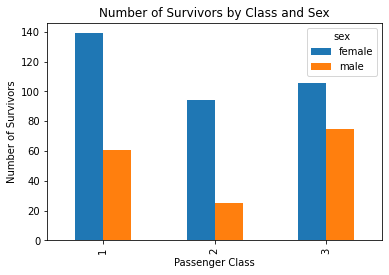

In [16]:
survival_counts.plot.bar()
plt.ylabel("Number of Survivors")
plt.xlabel("Passenger Class")
plt.title("Number of Survivors by Class and Sex")

**Warning:** Remember that `plt.xlabel()` and `plt.ylabel()` are _functions_, not attributes. That is, you cannot set the $x$-label by writing `plt.xlabel = "Passenger Class"`. You have to call `plt.xlabel()` as a function on the string that you want to set as the label: `plt.xlabel("Passenger Class")`.

## Customizing the Axes

There are many reasons to customize the axes. We may want to restrict the range of the axes to where the data lives or change the spacing of the ticks.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

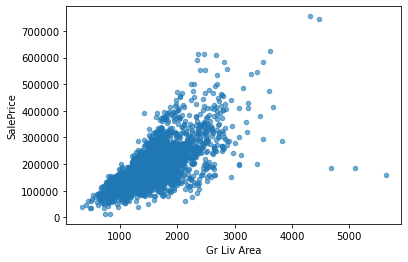

In [22]:
housing.plot.scatter(x="Gr Liv Area", y="SalePrice", alpha=0.6)

Notice that there are only a handful of homes that are larger than 4000 square feet. We may want to zoom in on the homes that are smaller than 4000 square feet. We may also want to anchor the plot at the origin, so that the bottom left corner is (0, 0). To do this, we set the range of the $x$- and $y$-axes manually using the `plt.xlim()` and `plt.ylim()` functions.

In [21]:
housing.shape

(2930, 82)

<AxesSubplot:xlabel='Bedroom AbvGr', ylabel='Full Bath'>

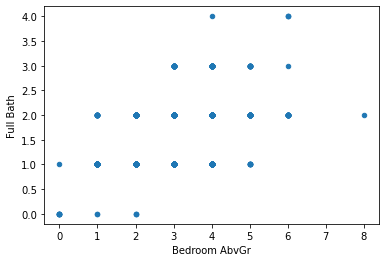

In [20]:
housing.plot.scatter(x="Bedroom AbvGr", y = "Full Bath")

(0.0, 700000.0)

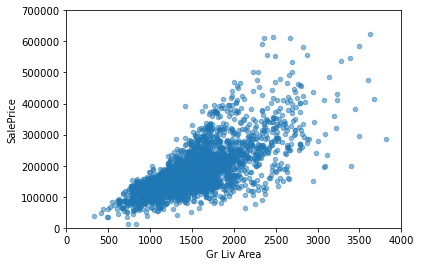

In [26]:
housing.plot.scatter(x="Gr Liv Area", y="SalePrice", alpha=0.5)
plt.xlim(0, 4000)
plt.ylim(0, 700000)

To change the locations of the ticks, we can set them manually using `plt.xticks()` and `plt.yticks()`. The ticks do not have to be evenly spaced. Both `plt.xticks()` and `plt.yticks()` take an optional second argument that specify the tick labels.

Text(0.5, 1.0, 'House Price vs. Square Footage in Ames, IA')

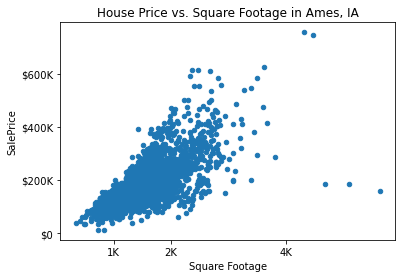

In [35]:
housing.plot.scatter(x="Gr Liv Area", y="SalePrice")
plt.xticks([1000, 2000, 4000], ["1K", "2K", "4K"])
plt.yticks([0, 200000, 400000, 600000],
           ["$0", "$200K", "$400K", "$600K"])
plt.xlabel("Square Footage")
plt.title("House Price vs. Square Footage in Ames, IA")

One reason to set the ticks manually is to eliminate "chartjunk": wasted ink on a graphic. Default graphics often have too many ticks with labels that are too long. The number of ticks can be reduced and the labels shortened without any loss in clarity.

Another source of "chartjunk" is unnecessary borders. For example, we can eliminate the "spines" of the top and right axes without any loss of information. To do this in `matplotlib`, we save the `AxesSubplot` object returned by the `pandas` plotting function and turn off the top and right spines.

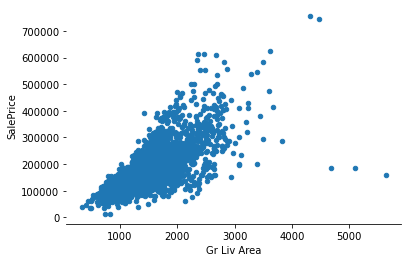

In [40]:
ax = housing.plot.scatter(x="Gr Liv Area", y="SalePrice")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

In [37]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [38]:
ax.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x7ff951e36f10>),
             ('right', <matplotlib.spines.Spine at 0x7ff951e36520>),
             ('bottom', <matplotlib.spines.Spine at 0x7ff951e363d0>),
             ('top', <matplotlib.spines.Spine at 0x7ff951e366a0>)])

We can even go so far as to turn off all of the spines, although this plot seems to lack the "structure" of the above plot. But this is a matter of taste.

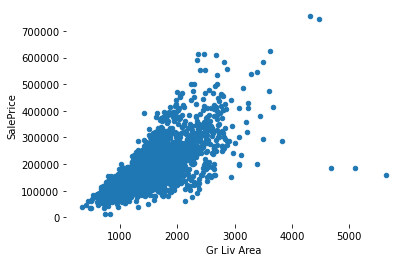

In [43]:
ax = housing.plot.scatter(x="Gr Liv Area", y="SalePrice")
for key in ax.spines:
    ax.spines[key].set_visible(False)

Notice that turning the spines off does not eliminate the ticks. We can eliminate the ticks by passing an empty list to `plt.xticks()` or `plt.yticks()`.

Text(0, 0.5, '')

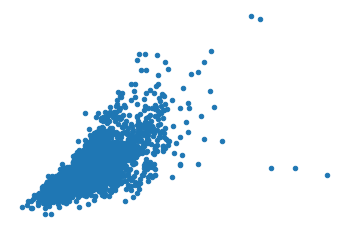

In [46]:
ax = housing.plot.scatter(x="Gr Liv Area", y="SalePrice")
for key in ax.spines:
    ax.spines[key].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.xlabel("")
plt.ylabel("")

## Style Sheets

The default `matplotlib` style sheet ("default") is acceptable, but leaves something to be desired aesthetically. You can choose a different style sheet using `plt.style.use()`. For example, to make plots using the "fivethirtyeight" style sheet (designed to produce graphics like the ones on [fivethirtyeight.com](http://www.fivethirtyeight.com/)), you would call `plt.style.use("fivethirtyeight")`.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

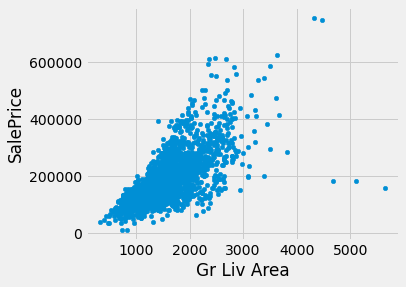

In [51]:
plt.style.use("fivethirtyeight")
housing.plot.scatter(x="Gr Liv Area", y="SalePrice", figsize=(5,4))

To see a list of all of the available `matplotlib` themes, print `plt.style.available`.

In [27]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

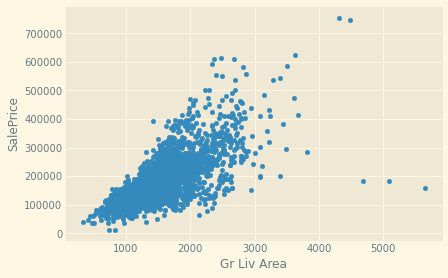

In [54]:
plt.style.use("Solarize_Light2")
housing.plot.scatter(x="Gr Liv Area", y="SalePrice")

The choice of styles is mostly aesthetic. But there are settings where a particular style is more appropriate. For example, the "dark_background" style helps the graphic blend in if it will be inserted into a presentation with a black background.

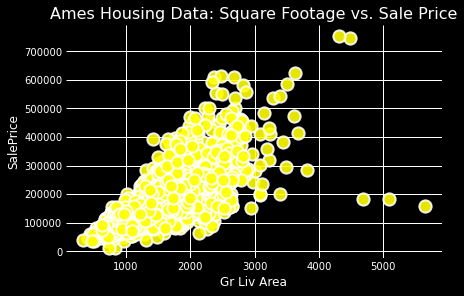

In [59]:
plt.style.use("dark_background")
g = housing.plot.scatter(x="Gr Liv Area", y="SalePrice", c="yellow", alpha=0.9, 
                        s=150, linewidth=2, edgecolors="white")
plt.title("Ames Housing Data: Square Footage vs. Sale Price")
for key in g.spines:
    g.spines[key].set_visible(False)

The "grayscale" style is useful if the graphic will be printed in grayscale, instead of in color.

<AxesSubplot:xlabel='pclass'>

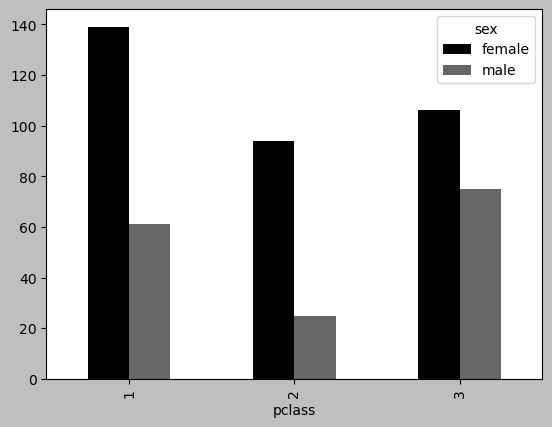

In [66]:
#plt.style.use("default")
plt.style.use("grayscale")
#rcParams["xtick.color"] = "blue"
survival_counts.plot.bar()

Suppose you like everything about the "grayscale" style sheet, except for the gray background. You can override any aspect of the style sheet by setting the appropriate parameter in the `rcParams` object of `matplotlib`. `rcParams` is essentially a dictionary that keeps track of the style of every element of a plot, from the figure size to the color cycle. A style sheet is nothing more than specification of the parameters in `rcParams`. For example, we see that the reason the background is gray is because the "figure.facecolor" parameter is set to "0.75" (with "0" being black and "1" being white).

In [79]:
from matplotlib import rcParams
rcParams
#rcParams["figure.facecolor"]

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

We can make the background color white by setting the "figure.facecolor" parameter to "1" or "w".

<AxesSubplot:xlabel='pclass'>

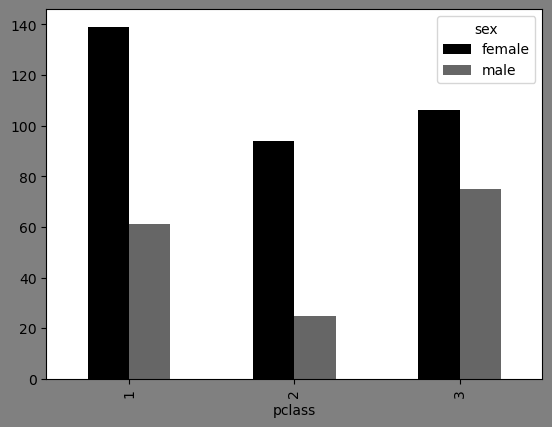

In [77]:
plt.style.use("grayscale")
rcParams["figure.facecolor"] = "0.5"
survival_counts.plot.bar()

Although it is not one of the available styles listed, we can revert to the original style at any time by setting the style to "default".

'pink'

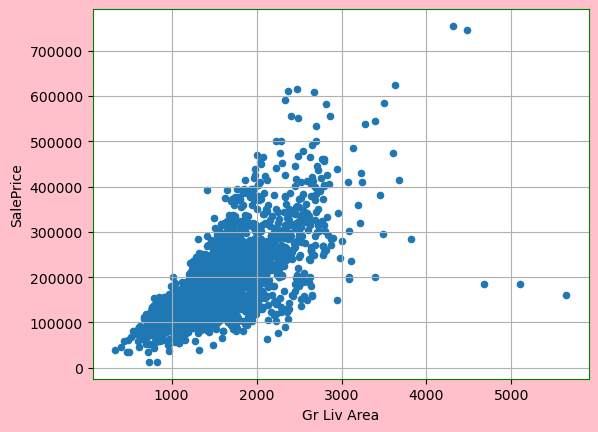

In [82]:
plt.style.use("default")
rcParams["figure.facecolor"] = 'pink'
rcParams["axes.grid"] = True
rcParams["axes.edgecolor"] = "green"
housing.plot.scatter(x="Gr Liv Area", y="SalePrice")
rcParams["figure.facecolor"]

## Figure Size

You might be surprised that the figure became larger when we returned to the "default" style. The reason for this is technical. The "default" style sheet specifies that the figure size should be (6.4, 4.8). But this parameter setting is overwritten by the "inline" backend of IPython (which is loaded when we call `%matplotlib inline`), which specifies that the figure size should be (6.0, 4.0). When we call `plt.style.use("default")` explicitly, the figure size is set to (6.4, 4.8), which is why it looks bigger than before.

To set the figure size explicitly, we can use the `figuresize=` argument of the `pandas` plotting method.

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

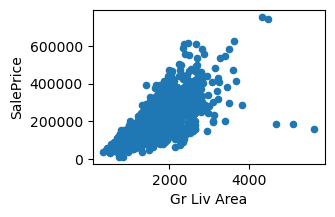

In [87]:
plt.style.use("default")
housing.plot.scatter(x="Gr Liv Area", y="SalePrice", figsize=(3,2))

## Saving

To save a figure to disk, use `plt.savefig()`. `matplotlib` will usually be able to determine the right format from the file extension.

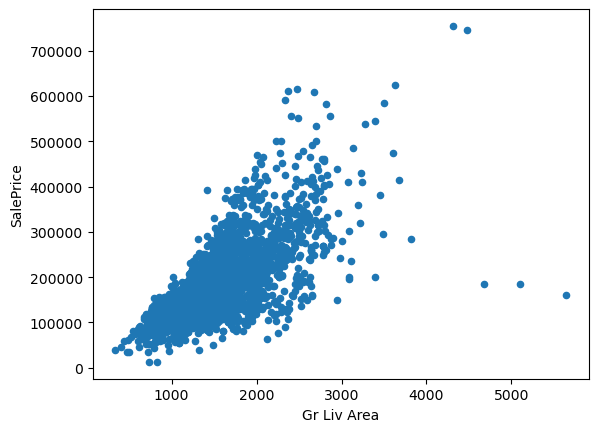

In [90]:
housing.plot.scatter(x="Gr Liv Area", y="SalePrice")
plt.savefig("sqft_vs_price.ps")

In [43]:
housing.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

## Builing Multi-dimensional visualizations

In a scatter plot, you have the following controls (plot parameters) that can help you express a variety of information beyond the two dimenstions the scatter plot itself affords:

1. X axis  
2. Y axis  
3. color of the mark
4. size of the mark
5. edge color of the mark
6. width of the mark's edge
7. mark shape (only categorical)

This actually gives one considerable leeway in shaping the visualizations.  Let's try to take this to the extreme.

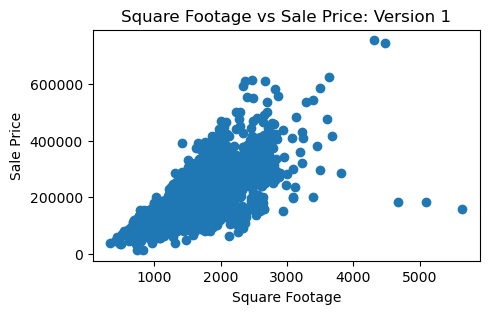

In [92]:
### Two dimensions

plt.figure(figsize=(5,3))
plt.title("Square Footage vs Sale Price: Version 1")
plt.scatter(x=housing["Gr Liv Area"], y=housing['SalePrice'])
plt.xlabel("Square Footage")
plt.ylabel("Sale Price")
plt.show()

Let's color the points based on square footage of the land plot.

In [97]:
np.log(housing["Lot Area"].sort_values(ascending=False))

956     12.279532
1570    12.011638
2115    11.976659
2071    11.653982
2766    11.167063
          ...    
977      7.297768
1599     7.297768
329      7.297091
2913     7.293018
935      7.170120
Name: Lot Area, Length: 2930, dtype: float64

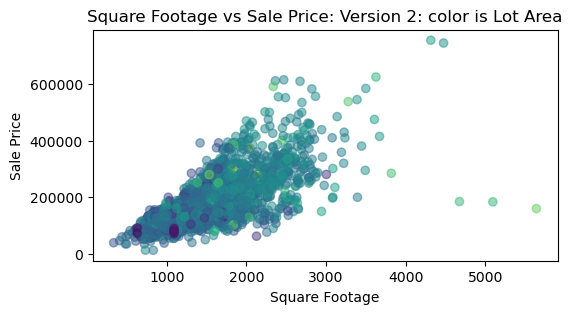

In [100]:
areaScaled = (housing['Lot Area'] - housing['Lot Area'].min())/(housing['Lot Area'].max()- housing['Lot Area'].min())

plt.figure(figsize=(6,3))
plt.title("Square Footage vs Sale Price: Version 2: color is Lot Area")
plt.scatter(x=housing["Gr Liv Area"], 
            y=housing['SalePrice'], 
            alpha=0.5, 
            c = np.log(housing['Lot Area']), 
            cmap = 'viridis')
plt.xlabel("Square Footage")
plt.ylabel("Sale Price")
plt.show()

Let's add a fourth dimension: the number of bedrooms. We'll use the size of the mark for this

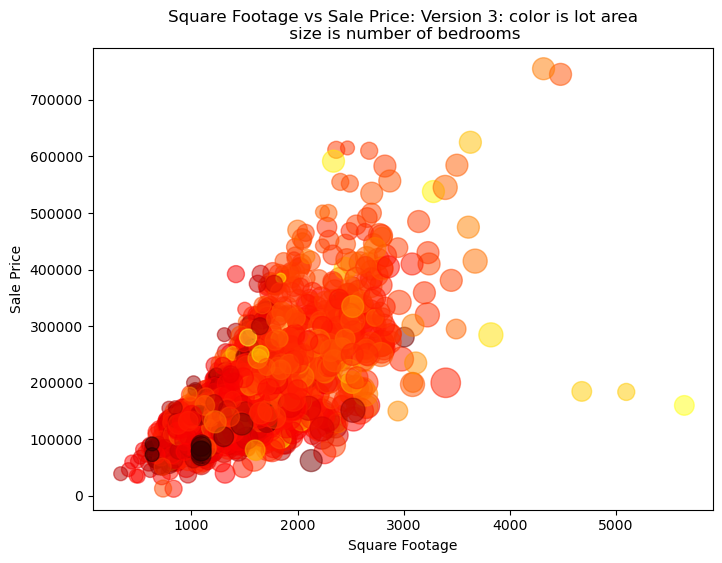

In [101]:

plt.figure(figsize=(8,6))
plt.title("Square Footage vs Sale Price: Version 3: color is lot area\n size is number of bedrooms")
plt.scatter(x=housing["Gr Liv Area"], y=housing['SalePrice'],
            s = 50+housing['Bedroom AbvGr']*50, 
            alpha=0.5, 
            c=np.log(housing['Lot Area']), 
            cmap = 'hot')
plt.xlabel("Square Footage")
plt.ylabel("Sale Price")
plt.show()

Let us now add the number of bathrooms into the mix. We will use edge width for this.


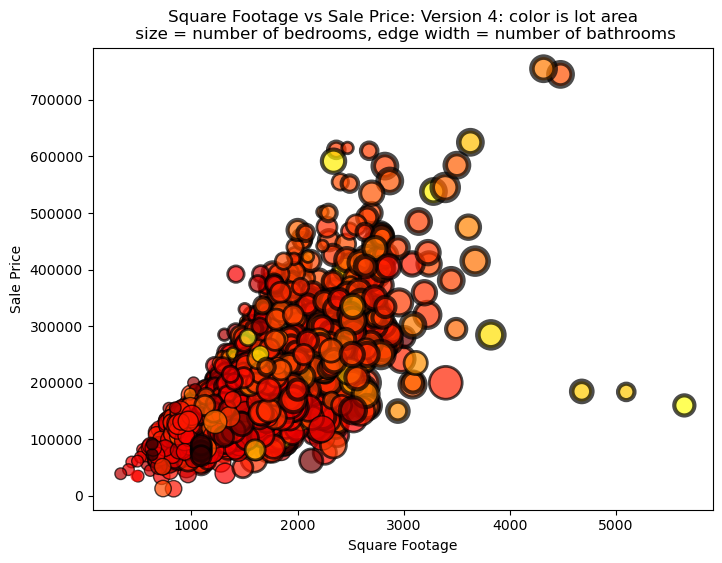

In [102]:

plt.figure(figsize=(8,6))
plt.title("Square Footage vs Sale Price: Version 4: color is lot area\n size = number of bedrooms, edge width = number of bathrooms")
plt.scatter(x=housing["Gr Liv Area"], y=housing['SalePrice'],   ## dimensions 1 and 2
            s = housing['Bedroom AbvGr']*70,                    ## dimension 3
            c=np.log(housing['Lot Area']),                      ## dimension 4
            linewidths = (housing['Full Bath']+ housing['Half Bath']), ## dimension 5
            edgecolors = 'black',
            alpha=0.7, cmap = 'hot')
plt.xlabel("Square Footage")
plt.ylabel("Sale Price")
plt.show()

In [103]:

housing["Kitchen Qual"].value_counts()

TA    1494
Gd    1160
Ex     205
Fa      70
Po       1
Name: Kitchen Qual, dtype: int64

Let's take quality of the kitchen into account by coloring the edges.

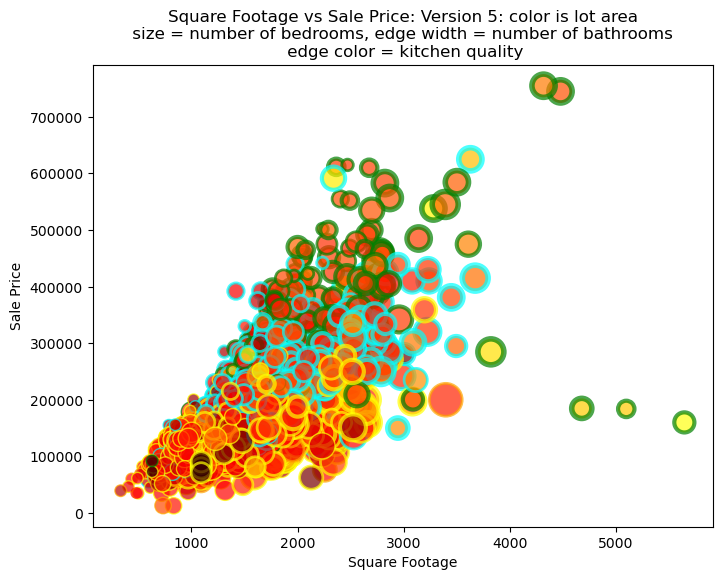

In [104]:
kitchenQ = housing['Kitchen Qual'].map({'Ex':"green", 'Gd':"cyan", 'TA':'yellow', 'Fa':'orange', 'Po':'red'})   ## convert kitchen quality into colors


plt.figure(figsize=(8,6))
plt.title("Square Footage vs Sale Price: Version 5: color is lot area\n size = number of bedrooms, edge width = number of bathrooms \n edge color = kitchen quality")
plt.scatter(x=housing["Gr Liv Area"], y=housing['SalePrice'],   ## dimensions 1 and 2
            s = housing['Bedroom AbvGr']*70,                    ## dimension 3
            c=np.log(housing['Lot Area']),                      ## dimension 4
            linewidths = (housing['Full Bath']+ housing['Half Bath']), ## dimension 5
            edgecolors = kitchenQ,                              ## dimension 6
            alpha=0.7, cmap = 'hot')
plt.xlabel("Square Footage")
plt.ylabel("Sale Price")
plt.show()

Now, for the final step: let's use different markers for houses sold in different years.

In [105]:
housing['Yr Sold'].value_counts()

2007    694
2009    648
2006    625
2008    622
2010    341
Name: Yr Sold, dtype: int64

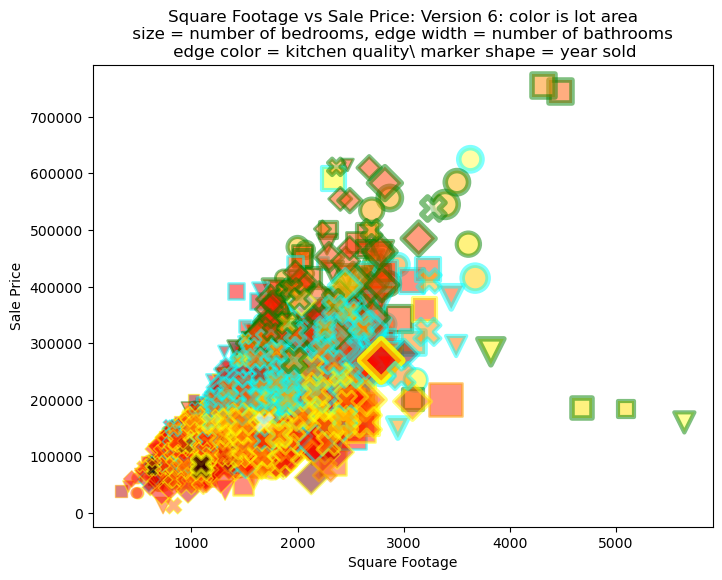

In [107]:
hShapes = {2006: "o", 2007: 's', 2008: 'v', 2009: 'D', 2010: 'X'}


plt.figure(figsize=(8,6))
plt.title("Square Footage vs Sale Price: Version 6: color is lot area\n size = number of bedrooms, edge width = number of bathrooms \n edge color = kitchen quality\ marker shape = year sold")
for year in housing['Yr Sold'].unique():
#for year in [2006,2007,2008,2009,2010] :
    h = housing[housing['Yr Sold']== year]
    plt.scatter(x=h["Gr Liv Area"], y=h['SalePrice'],          ## dimensions 1 and 2
            s = h['Bedroom AbvGr']*70,                         ## dimension 3
            c=np.log(h['Lot Area']),                     ## dimension 4
            linewidths = (h['Full Bath']+ h['Half Bath']),     ## dimension 5
            edgecolors = kitchenQ[housing['Yr Sold']==year],   ## dimension 6
            marker =  hShapes[year],                                      ## dimension 7
            alpha=0.5, cmap = 'hot')
plt.xlabel("Square Footage")
plt.ylabel("Sale Price")
plt.show()

# Exercises

**Exercise 1.** Make a publication-ready graphic that communicates the information in the `tips` data set (`../data/tips.csv`). Your graphic should have a title, self-explanatory axes labels, and reasonable axes ranges. Use an appropriate style, and save your graphic to disk.

In [ ]:
# TYPE YOUR CODE HERE.